## Initializing PRAW and Retrieving Reddit Data

In [1]:
# # Install PRAW package for accessing Reddit API
!pip install praw

## Reddit API Wrapper Configuration

In [2]:
# Reddit API wrapper
import praw

# Set up Reddit API credentials
user_agent = "Reddit_Scrapper 1.0 by /u/FeatureChoice5036"
reddit = praw.Reddit(
    client_id="qb4A2A6dE8mX5hf8L9NW9w",
    client_secret="RVwZPIBhDOS-HxJKVs9n0R5EvbqeXA",
    user_agent=user_agent
)

## Libraries for Data Manipulation and Numerical Computing

In [3]:
# Data manipulation library
import pandas as pd

# Numerical computing library
import numpy as np

# Regular expression library for text cleaning
import re

## Reddit Submission Data Collection and Analysis

In [4]:
# Initialize an empty set to store unique submission titles
headlines = set()

# Loop through submissions in the "bitcoin" subreddit, fetching various attributes of each submission
for submission in reddit.subreddit("bitcoin").hot(limit=None):
    print(submission.title)#Subreddit Title
    print(submission.id) #ID
    print(submission.author) #Author of the subreddit
    print(submission.created_utc) #Date and time being created
# Print the timestamp of when the submission was created (in UTC)
    print(submission.score) # Average Score
    print(submission.upvote_ratio) # Upvote ratio
    print(submission.url) # Like to the Subreddit
    break
    headlines.add(submission.title)
    
# Add the title of the submission to the set of headlines
print(len(headlines))

Bitcoin Newcomers FAQ - Please read!
1bg5lv0
BitcoinFan7
1710594154.0
192
0.96
https://www.reddit.com/r/Bitcoin/comments/1bg5lv0/bitcoin_newcomers_faq_please_read/
0


## Get total comment in Subreddit

In [5]:
# Fetching data from the 'bitcoin' subreddit
headlines = set()
for submission in reddit.subreddit("bitcoin").hot(limit=None):
    headlines.add(submission.title)
print(len(headlines))

677


## Data Cleaning and Preparation

In [6]:
#Create a dataframe from the scrapped data 
bitcoin_df = pd.DataFrame(headlines)

# Display the first few rows of the DataFrame
bitcoin_df.head()

,0
0,JULIAN ASSANGE (OG Bitcoiner) IS FREE
1,Green wallet unavailable
2,"Bitcoin, Human Rights and Beyond: Takeaways fr..."
3,Buying Bitcoin from a Vending Machine at $7 in...
4,Supreme Court limits power of SEC to unilatera...


## Displaying Dataframe Column Names

In [7]:
# Display the column names of the DataFrame
bitcoin_df.columns

RangeIndex(start=0, stop=1, step=1)

## Renaming Dataframe Column

In [8]:
# Rename the column to 'Titles'
bitcoin_df.columns = ['Titles']

## Displaying First Few Rows with Updated Column Name

In [9]:
# Display the first few rows of the DataFrame with the updated column name
bitcoin_df.head()

,Titles
0,JULIAN ASSANGE (OG Bitcoiner) IS FREE
1,Green wallet unavailable
2,"Bitcoin, Human Rights and Beyond: Takeaways fr..."
3,Buying Bitcoin from a Vending Machine at $7 in...
4,Supreme Court limits power of SEC to unilatera...


## Counting Duplicated Titles

In [10]:
# Count the number of duplicated titles in the 'Titles' column
bitcoin_df.Titles.duplicated().sum() 

0

## Text Cleaning Function 

In [11]:
#Clean the text

#Create a function to clean the tweets
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #Remove @mentions replace with blank
    text = re.sub(r'#', '', text) #Remove the '#' symbol, replace with blank
    text = re.sub(r'RT[\s]+', '', text) #Removing RT, replace with blank
    text = re.sub(r'https?:\/\/\S+', '', text) #Remove the hyperlinks
    text = re.sub(r':', '', text) # Remove :
    
    return text

#Cleaning the text
bitcoin_df["Titles"]= bitcoin_df["Titles"].apply(cleanTxt)

#Show the clean text
bitcoin_df.head()


,Titles
0,JULIAN ASSANGE (OG Bitcoiner) IS FREE
1,Green wallet unavailable
2,"Bitcoin, Human Rights and Beyond Takeaways fro..."
3,Buying Bitcoin from a Vending Machine at $7 in...
4,Supreme Court limits power of SEC to unilatera...


## Function to Remove Emojis and Unicode Characters

In [12]:
#Next we have to remove emoji & Unicode from the reddit data.
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

#Cleaning the text
bitcoin_df["Titles"]= bitcoin_df["Titles"].apply(remove_emoji)

#Show the clean text
bitcoin_df.head()

,Titles
0,JULIAN ASSANGE (OG Bitcoiner) IS FREE
1,Green wallet unavailable
2,"Bitcoin, Human Rights and Beyond Takeaways fro..."
3,Buying Bitcoin from a Vending Machine at $7 in...
4,Supreme Court limits power of SEC to unilatera...


## Installing TextBlob Package

In [13]:
# Install TextBlob package for sentiment analysis
!pip install textblob

## Sentiment Analysis

In [14]:
# Import necessary libraries
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

## Functions for Subjectivity and Polarity Analysis

In [15]:
#Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a function to get Polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Now we create a new column for what we just did and add it to the Tweet_df dataframe
bitcoin_df['Subjectivity'] = bitcoin_df['Titles'].apply(getSubjectivity)
bitcoin_df['Polarity'] = bitcoin_df['Titles'].apply(getPolarity)

#Now display data
bitcoin_df.head()

,Titles,Subjectivity,Polarity
0,JULIAN ASSANGE (OG Bitcoiner) IS FREE,0.800000,0.4
1,Green wallet unavailable,0.300000,-0.2
2,"Bitcoin, Human Rights and Beyond Takeaways fro...",0.100000,0.0
3,Buying Bitcoin from a Vending Machine at $7 in...,0.000000,0.0
4,Supreme Court limits power of SEC to unilatera...,0.433333,-0.2


## Function to Categorize Polarity Scores

In [16]:
#Group the range of Polarity to different categories
def getInsight(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"

# Apply the getInsight function to the 'Polarity' column and store the results in a new column 'Insight'
bitcoin_df["Insight"] = bitcoin_df["Polarity"].apply(getInsight)

# Display the first 50 rows of the dataframe with the new 'Insight' column
bitcoin_df.head(50)

,Titles,Subjectivity,Polarity,Insight
0,JULIAN ASSANGE (OG Bitcoiner) IS FREE,0.800000,0.400000,Positive
1,Green wallet unavailable,0.300000,-0.200000,Negative
2,"Bitcoin, Human Rights and Beyond Takeaways fro...",0.100000,0.000000,Neutral
3,Buying Bitcoin from a Vending Machine at $7 in...,0.000000,0.000000,Neutral
4,Supreme Court limits power of SEC to unilatera...,0.433333,-0.200000,Negative
5,Accurate nowadays,0.633333,0.400000,Positive
6,This may be a stupid question but here goes. I...,0.750000,-0.150000,Negative
7,How do you explain how bitcoin is created and ...,0.000000,0.000000,Neutral
8,Bitcoin Knots 27.1.knots20240621 released!,0.000000,0.000000,Neutral
9,How to make BTC appealing to the avarage person?,0.500000,0.500000,Positive


## Categorizing Sentiment

In [17]:
# Import the necessary libraries
import seaborn as sns
import warnings
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Set the plot style to 'fivethirtyeight'
plt.style.use('fivethirtyeight')

## Visualizing the Data

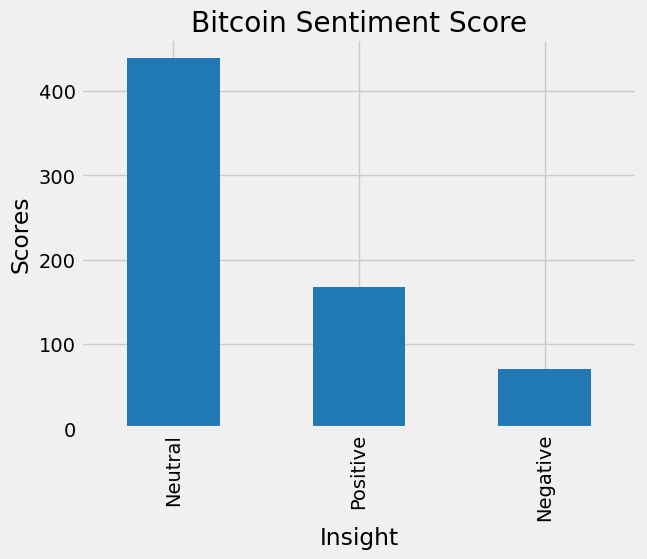

In [18]:
#Plot the values count of sentiment
plt.title("Bitcoin Sentiment Score")
plt.xlabel("Sentiment")
plt.ylabel("Scores")
plt.rcParams["figure.figsize"] = (10,8)
bitcoin_df["Insight"].value_counts().plot(kind="bar", color="#2078B4")
plt.show()

## Wordcloud

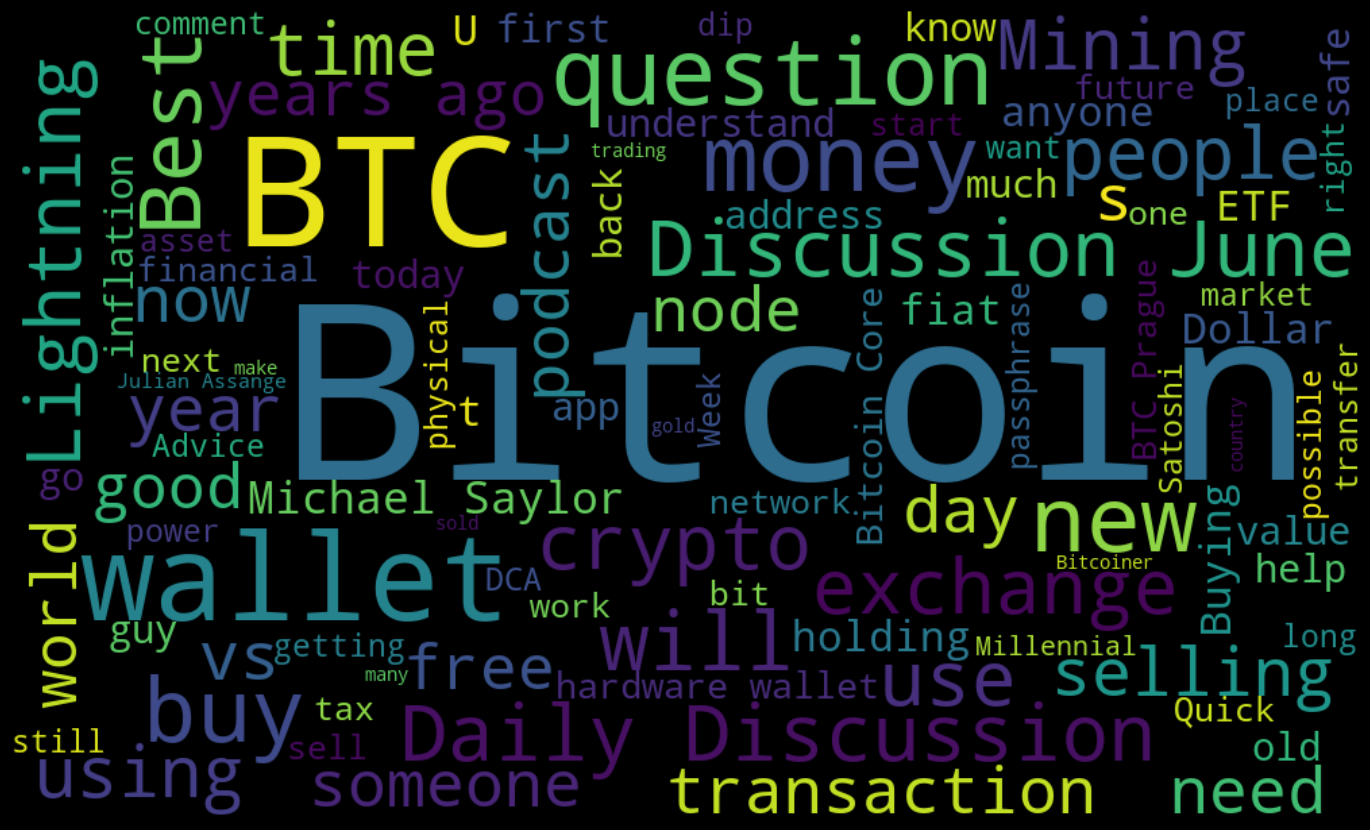

In [19]:
# Concatenate all titles into a single string
text = ' '.join( [twts for twts in bitcoin_df['Titles']] ) #To join all tweet

# Generate word cloud 
wordcloud = WordCloud(width=1000, height = 600,
                      
                      max_words = 100,
                      stopwords = STOPWORDS,
                      background_color="black").generate(text)

# Display the generated image:
plt.figure( figsize=(20,10), facecolor='k' )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");